# Model Evaluation Metrics
### Logistic Regression - Diabetes Prediction

Boise State University\
Department of Computer Science\
CS 334 Algorithms of Machine Learning\
Conrad Kennington\
Fall 2020

Simple Logistic Regression Example using scikit-learn.

In [4]:
#import pandas
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
patients = pd.read_csv("diabetes.csv", header=None, names=col_names, skiprows=[0])

In [5]:
patients.head() # Note all the features are numeric

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


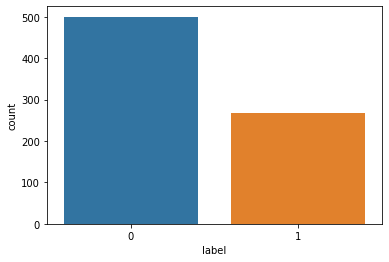

In [6]:
import seaborn as sns
ax = sns.countplot(x="label", data=patients) # Without vs with Diabetes

In [7]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = patients[feature_cols] # Features
y = patients.label # Target variable

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [10]:
X_test

,pregnant,insulin,bmi,age,glucose,bp,pedigree
661,1,0,42.9,22,199,76,1.394
122,2,100,33.6,23,107,74,0.404
113,4,0,34.0,25,76,62,0.391
14,5,175,25.8,51,166,72,0.587
529,0,0,24.6,31,111,65,0.660
...,...,...,...,...,...,...,...
366,6,0,27.6,29,124,72,0.368
301,2,135,31.6,25,144,58,0.422
382,1,182,25.4,21,109,60,0.947
140,3,0,21.1,55,128,78,0.268


In [11]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8020833333333334


## What does accuracy mean?
## Introducing the Confusion Matrix

![Image](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

In [12]:
# Import Confusion Matrix
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_test, y_pred)

array([[118,  12],
       [ 26,  36]])

## Count them an see for yourself...

### On the left is what the model predicted, on the right is the actual outcome

In [14]:
import numpy as np
# Convery Pandas series to numpy array, so we can zip them together.
np.array(list(zip(y_test.to_numpy(),y_pred)))

array([[1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1,

# ROC Curve

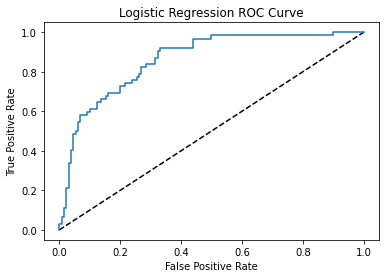

In [15]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();


# AUC Area under the curve

In [16]:
# This uses an integral
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.8610421836228287

# F1 Score

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6545454545454547

### F1 vs Accuracy

Which is more important?

They both give you insights, and it depends on your data set.

F1 tells you how well you balance between predicting both classes.\
Accuracy might be high, but F1 can be 0 if your model only predicts one class.\
F1 doesn't tell you which class is better through (precision vs recall).